## Library set up

In [3]:
# Scientific libraries
import numpy as np
import pandas as pd 

# Visual libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Logging
import logging

# Progress bar
from tqdm.notebook import tqdm, trange 
import warnings
warnings.filterwarnings('ignore')

# Visual setup
# sets the figure format to 'retina' for high-resolution displays
%config InlineBackend.figure_format = 'retina'

# Pandas options for displaying all interactions
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' 

# Table styles
table_styles = {
    'cerulean_palette': [
        dict(selector="th", props=[("color", "#FFFFFF"), ("background", "#004D80")]),
        dict(selector="td", props=[("color", "#333333")]),
        dict(selector="table", props=[("font-family", 'Arial'), ("border-collapse", "collapse")]),
        dict(selector='tr:nth-child(even)', props=[('background', '#D3EEFF')]),
        dict(selector='tr:nth-child(odd)', props=[('background', '#FFFFFF')]),
        dict(selector="th", props=[("border", "1px solid #0070BA")]),
        dict(selector="td", props=[("border", "1px solid #0070BA")]),
        dict(selector="tr:hover", props=[("background", "#80D0FF")]),
        dict(selector="tr", props=[("transition", "background 0.5s ease")]),
        dict(selector="th:hover", props=[("font-size", "1.07rem")]),
        dict(selector="th", props=[("transition", "font-size 0.5s ease-in-out")]),
        dict(selector="td:hover", props=[('font-size', '1.07rem'),('font-weight', 'bold')]),
        dict(selector="td", props=[("transition", "font-size 0.5s ease-in-out")])
    ]
}

# Seed value for numpy.random => makes notebooks stable across runs
np.random.seed(42)

In [8]:
df = pd.read_csv("laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


* There are no null values
* The unnamed: 0 can be removed as that is of no use for us.
* Except inches and price everything is an object.

In [13]:
df.describe()
df.drop(columns=['Unnamed: 0'],inplace=True)

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [14]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [26]:
# Unique categories in each column

cols = df.select_dtypes(include='object').columns


def unique_values(col):
    for i in col:
        print(f"The total number of unique values in {i}={df[i].nunique()}")
        print("-------------------------------------------------------------")

In [27]:
unique_values(cols)

The total number of unique values in Company=19
-------------------------------------------------------------
The total number of unique values in TypeName=6
-------------------------------------------------------------
The total number of unique values in ScreenResolution=40
-------------------------------------------------------------
The total number of unique values in Cpu=118
-------------------------------------------------------------
The total number of unique values in Ram=9
-------------------------------------------------------------
The total number of unique values in Memory=39
-------------------------------------------------------------
The total number of unique values in Gpu=110
-------------------------------------------------------------
The total number of unique values in OpSys=9
-------------------------------------------------------------
The total number of unique values in Weight=179
-------------------------------------------------------------


In [44]:
# Checking missing values
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

* Ram and weight are in object due to the alphabet they have at their end.
* Removing gb and kg from both of these columns and making them int and float.

In [48]:
df['Ram']=df['Ram'].str.replace('GB','')

In [51]:
df['Weight']=df['Weight'].str.replace('kg','')

In [54]:
df['Ram']=df['Ram'].astype(int)
df['Weight']=df['Weight'].astype(float)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


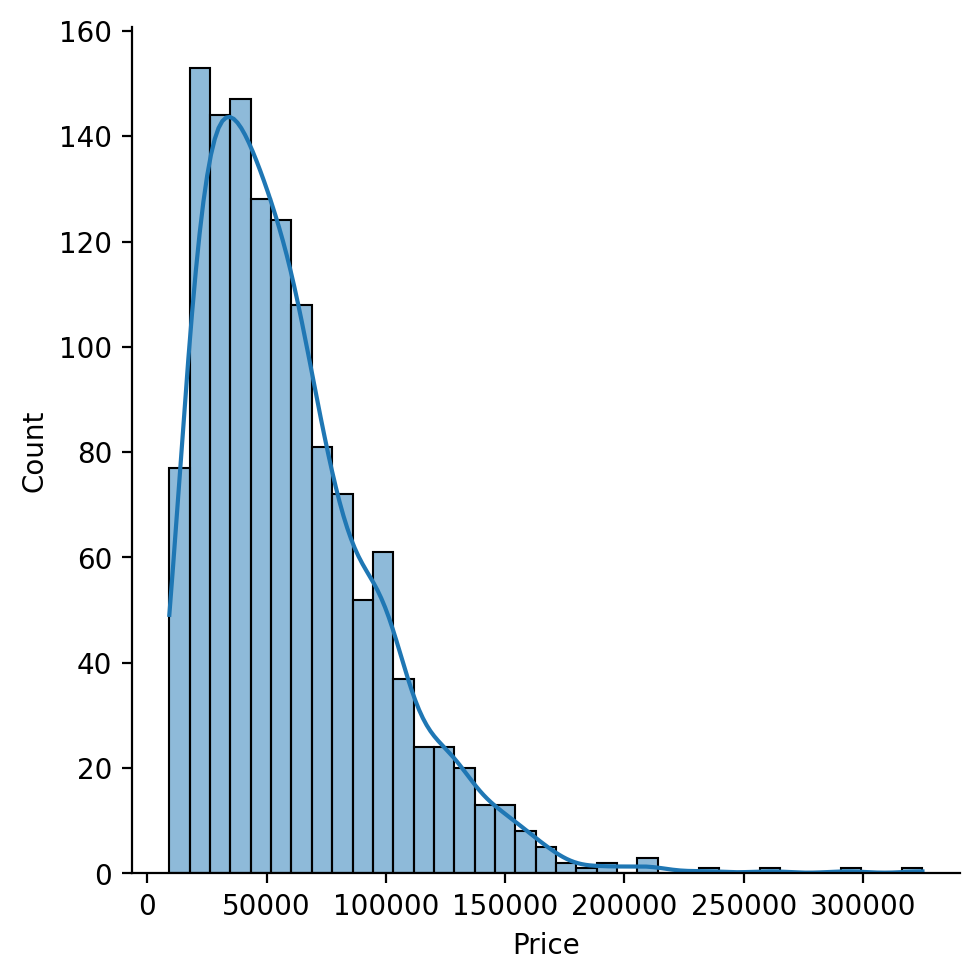

In [57]:
sns.displot(df['Price'],kde=True)

As can be seen above the price is little right skewed.

<Axes: xlabel='Company'>

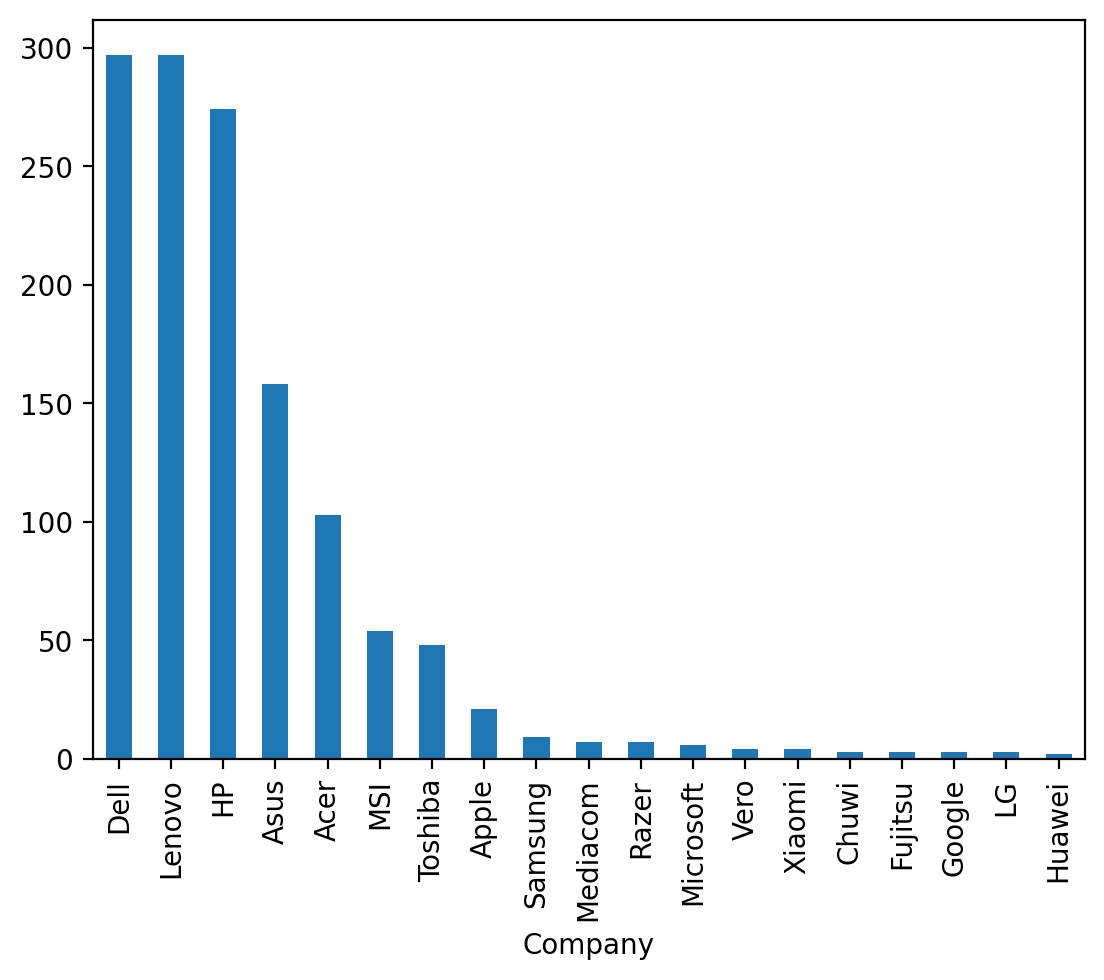

In [64]:
df['Company'].value_counts().plot(kind='bar')

<Axes: xlabel='Company', ylabel='Price'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, 'Apple'),
  Text(1, 0, 'HP'),
  Text(2, 0, 'Acer'),
  Text(3, 0, 'Asus'),
  Text(4, 0, 'Dell'),
  Text(5, 0, 'Lenovo'),
  Text(6, 0, 'Chuwi'),
  Text(7, 0, 'MSI'),
  Text(8, 0, 'Microsoft'),
  Text(9, 0, 'Toshiba'),
  Text(10, 0, 'Huawei'),
  Text(11, 0, 'Xiaomi'),
  Text(12, 0, 'Vero'),
  Text(13, 0, 'Razer'),
  Text(14, 0, 'Mediacom'),
  Text(15, 0, 'Samsung'),
  Text(16, 0, 'Google'),
  Text(17, 0, 'Fujitsu'),
  Text(18, 0, 'LG')])

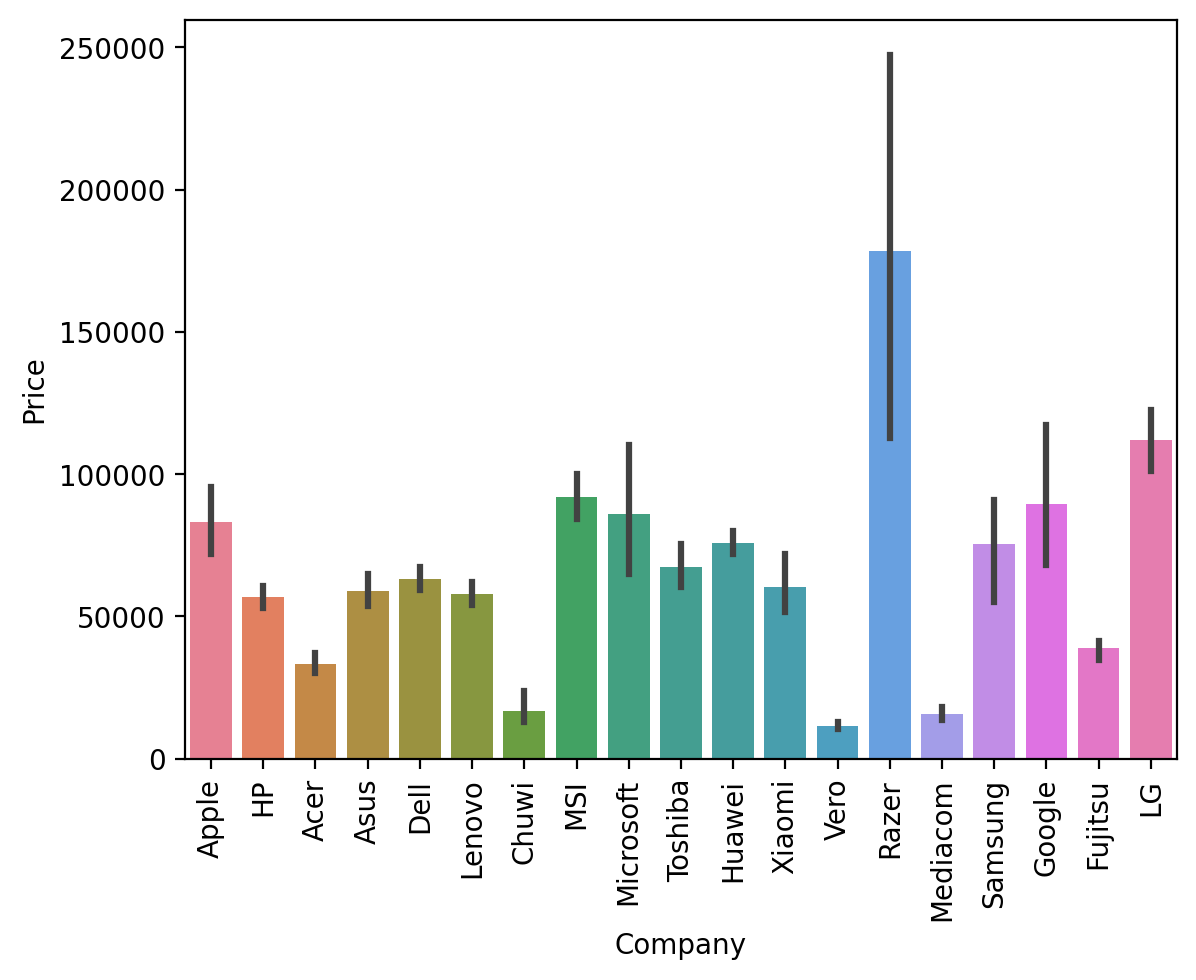

In [71]:
sns.barplot(x=df['Company'],y=df['Price'],hue=df['Company'])
plt.xticks(rotation=90)
plt.show()

As can be seen, the most expensive laptops are of brand Razer, Apple, LG

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64

<Axes: xlabel='TypeName', ylabel='count'>

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

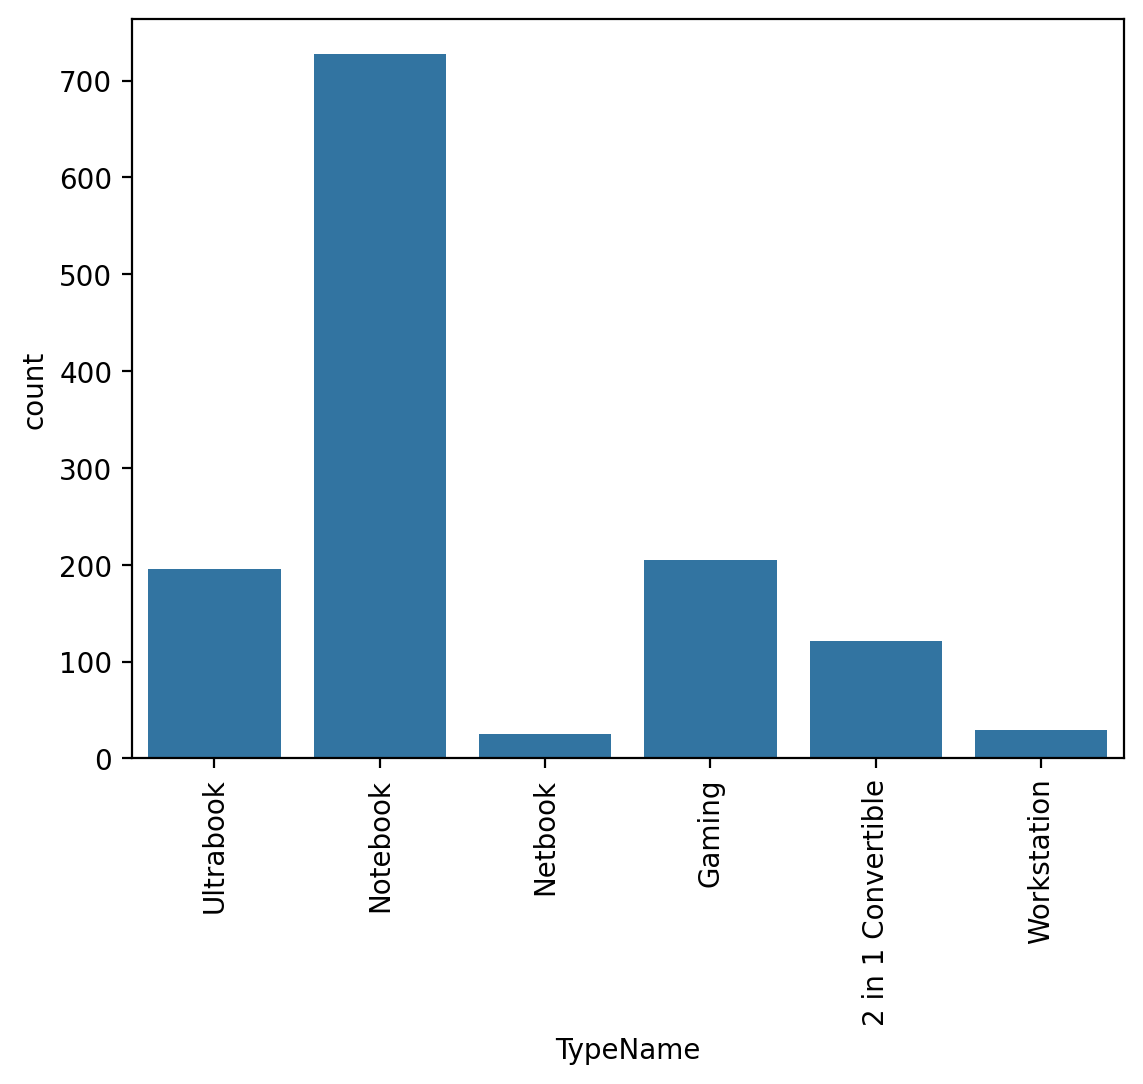

In [74]:
df['TypeName'].value_counts()
sns.countplot(x=df['TypeName'])
plt.xticks(rotation=90)

* Notebooks are the most common followed by ultrabook and gaming laptops.

<Axes: xlabel='TypeName', ylabel='Price'>

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Ultrabook'),
  Text(1, 0, 'Notebook'),
  Text(2, 0, 'Netbook'),
  Text(3, 0, 'Gaming'),
  Text(4, 0, '2 in 1 Convertible'),
  Text(5, 0, 'Workstation')])

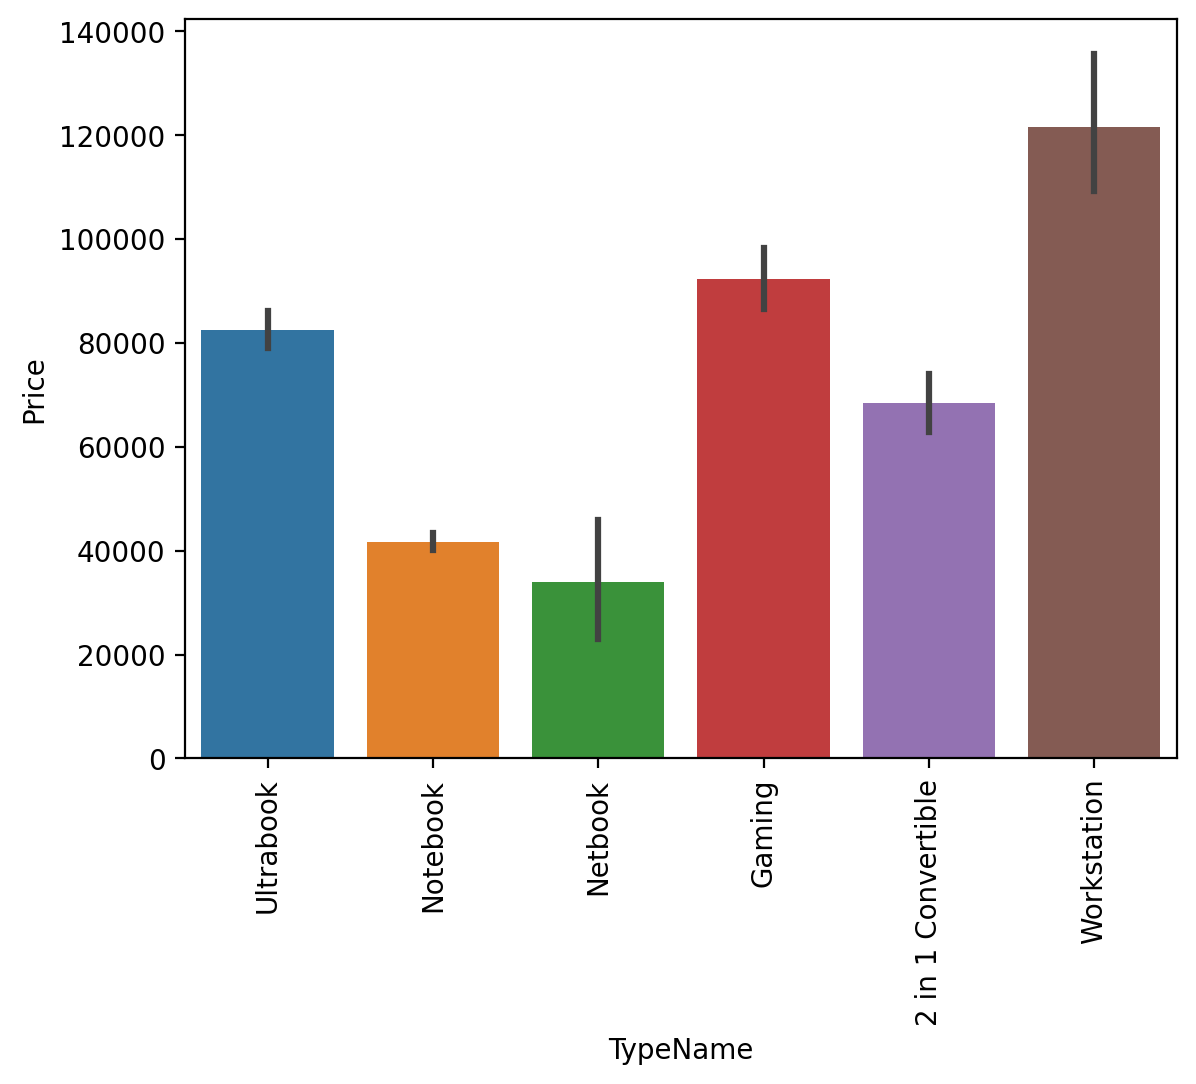

In [77]:
sns.barplot(x=df['TypeName'],y=df['Price'],hue=df['TypeName'])
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='Density'>

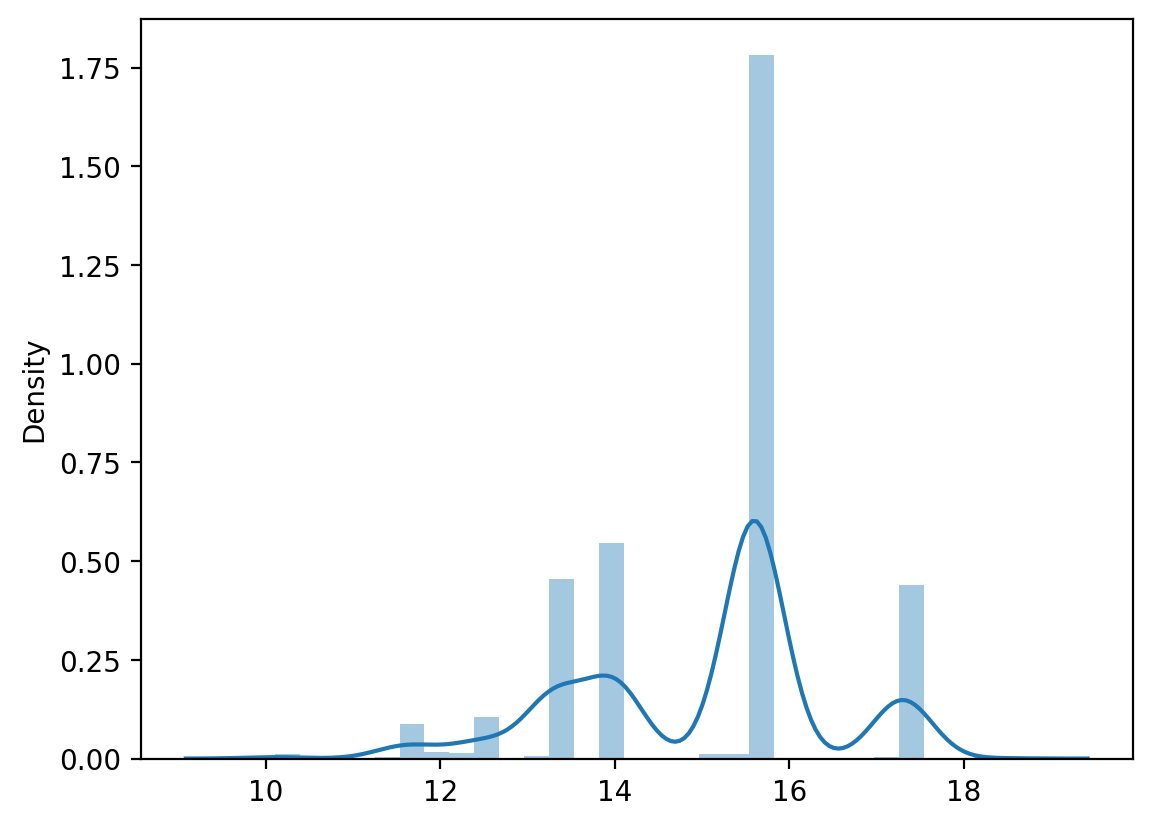

In [79]:
sns.distplot(x=df['Inches'],kde=True)

In [81]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Touchscreen 2560x14

There is a lot of information hidden in the Screen resolution columns such as
* Touchscreen or not
* Has an IPS display or not
* Also the resolution

Let's make 4 columns out of the screen resolution i.e touchscreen, IPS, resolution_x, resolution_y

In [84]:
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [87]:
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [103]:
df['Y_res']=df['ScreenResolution'].str.split('x',expand=True)[1]

In [105]:
df['X_res']=df['ScreenResolution'].str.split('x',expand=True)[0].apply(lambda x: x[-4:])

In [109]:
df['Y_res']=df['Y_res'].astype(int)
df['X_res']=df['X_res'].astype(int)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  Y_res             1303 non-null   int64  
 14  X_res             1303 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 152.8+ KB


X resolution, y resolution and inches can be used to create a more useful feature called ppi, since x res and y res cause multicollinearity.

In [115]:
df['ppi']=round(((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches'],2).astype(float)

In [117]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   TypeName     1303 non-null   object 
 2   Cpu          1303 non-null   object 
 3   Ram          1303 non-null   int64  
 4   Memory       1303 non-null   object 
 5   Gpu          1303 non-null   object 
 6   OpSys        1303 non-null   object 
 7   Weight       1303 non-null   float64
 8   Price        1303 non-null   float64
 9   Touchscreen  1303 non-null   int64  
 10  IPS          1303 non-null   int64  
 11  ppi          1303 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 122.3+ KB


In [119]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

Cpu column has much information stored in the form of strings, let us separate them for more meaningful and useful columns.

In [123]:
df['Cpu name']=df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [124]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5


In [125]:
def text_processor(text):
    if text=='Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
    

In [127]:
df['Cpu brand']=df['Cpu name'].apply(text_processor)

<Axes: xlabel='Cpu brand'>

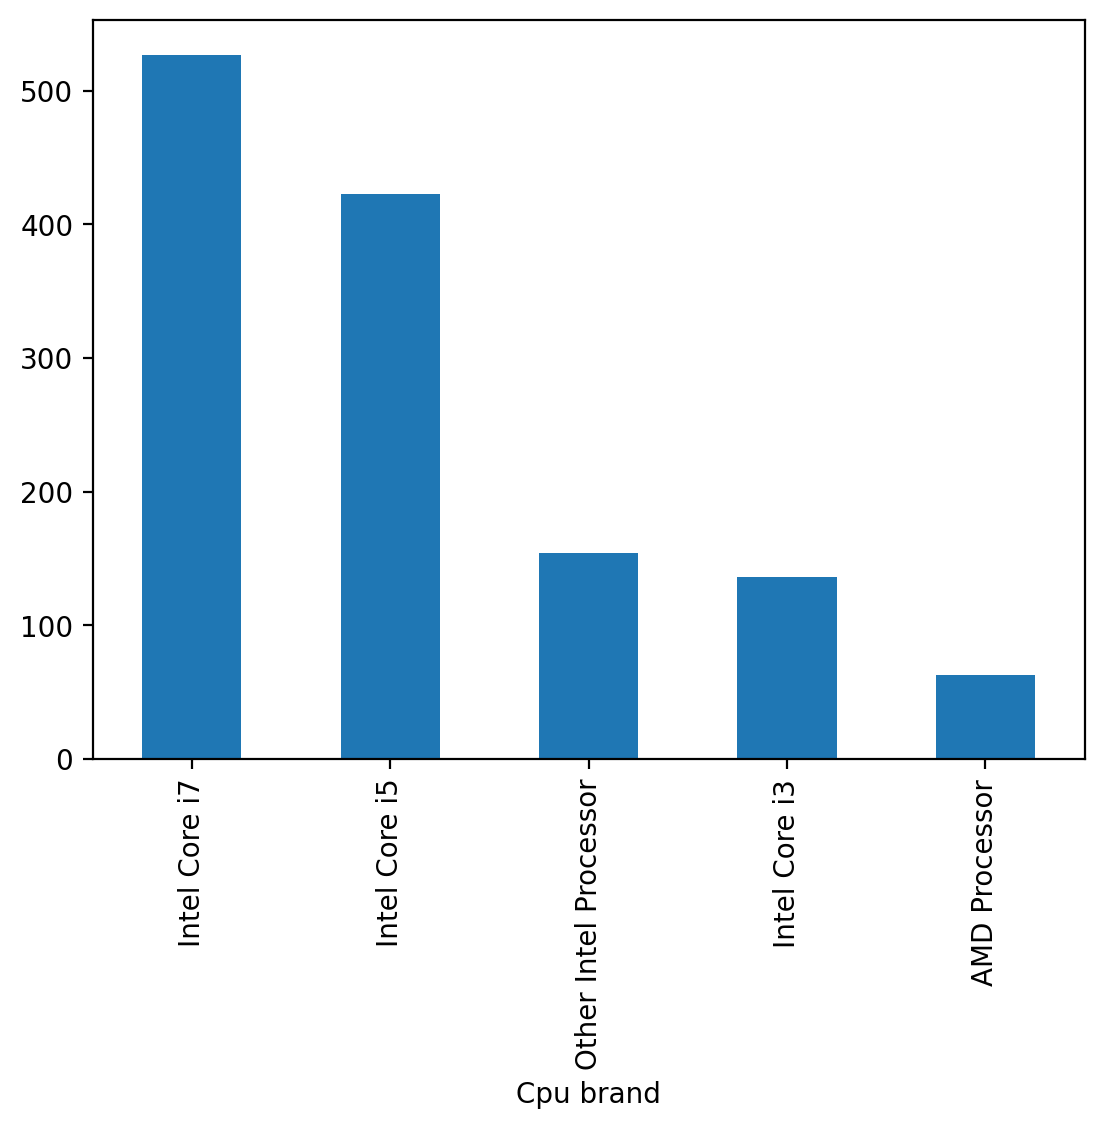

In [130]:
df['Cpu brand'].value_counts().plot(kind='bar')

<Axes: xlabel='Cpu brand', ylabel='Price'>

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Intel Core i5'),
  Text(1, 0, 'Intel Core i7'),
  Text(2, 0, 'AMD Processor'),
  Text(3, 0, 'Intel Core i3'),
  Text(4, 0, 'Other Intel Processor')])

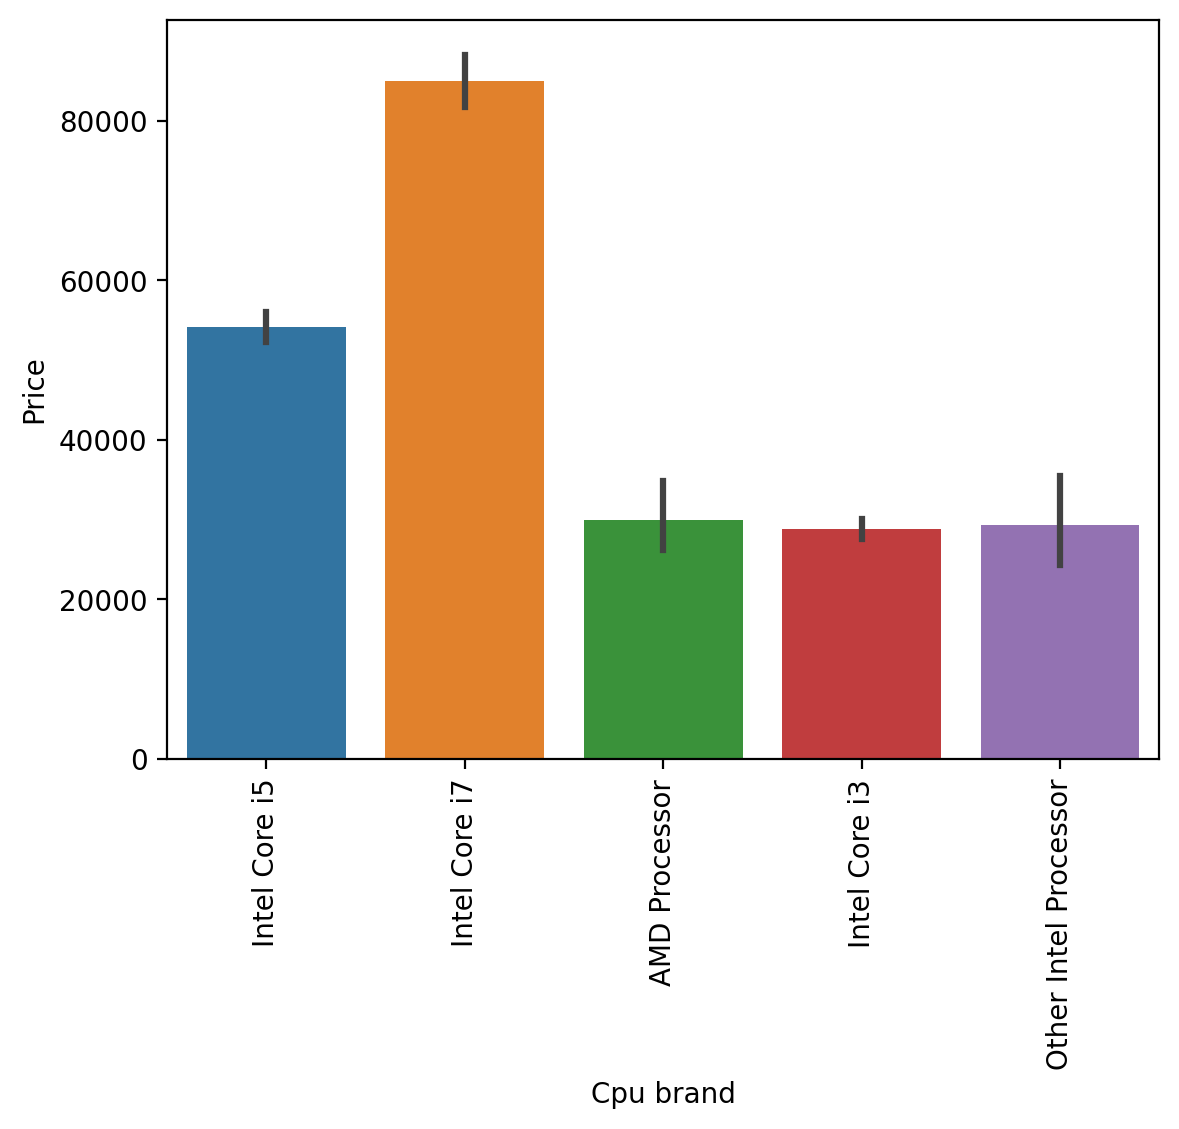

In [131]:
sns.barplot(x=df['Cpu brand'],y=df['Price'],hue=df['Cpu brand'])
plt.xticks(rotation=90)
plt.show()

Intel Core i7 are very expensive compared to the other processors, as it is the latest one and is more powerful.

In [135]:
df['Cpu speed']=df['Cpu'].apply(lambda x:x[-6:-3])

In [140]:

df.drop(columns=['Cpu','Cpu name'],inplace=True)

In [141]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,Cpu speed
1301,HP,Notebook,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.920,0,0,100.45,Intel Core i7,2.5
917,MSI,Gaming,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.70,85194.720,0,0,127.34,Intel Core i7,2.8
653,MSI,Gaming,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,63499.104,0,0,141.21,Intel Core i7,2.8
1089,Acer,Notebook,4,500GB HDD,AMD Radeon R5,Windows 10,2.40,20619.360,0,0,100.45,AMD Processor,2.2
1242,Acer,Notebook,4,500GB HDD,Intel HD Graphics 520,Linux,2.40,19276.704,0,0,100.45,Intel Core i3,2.0


<Axes: xlabel='Ram'>

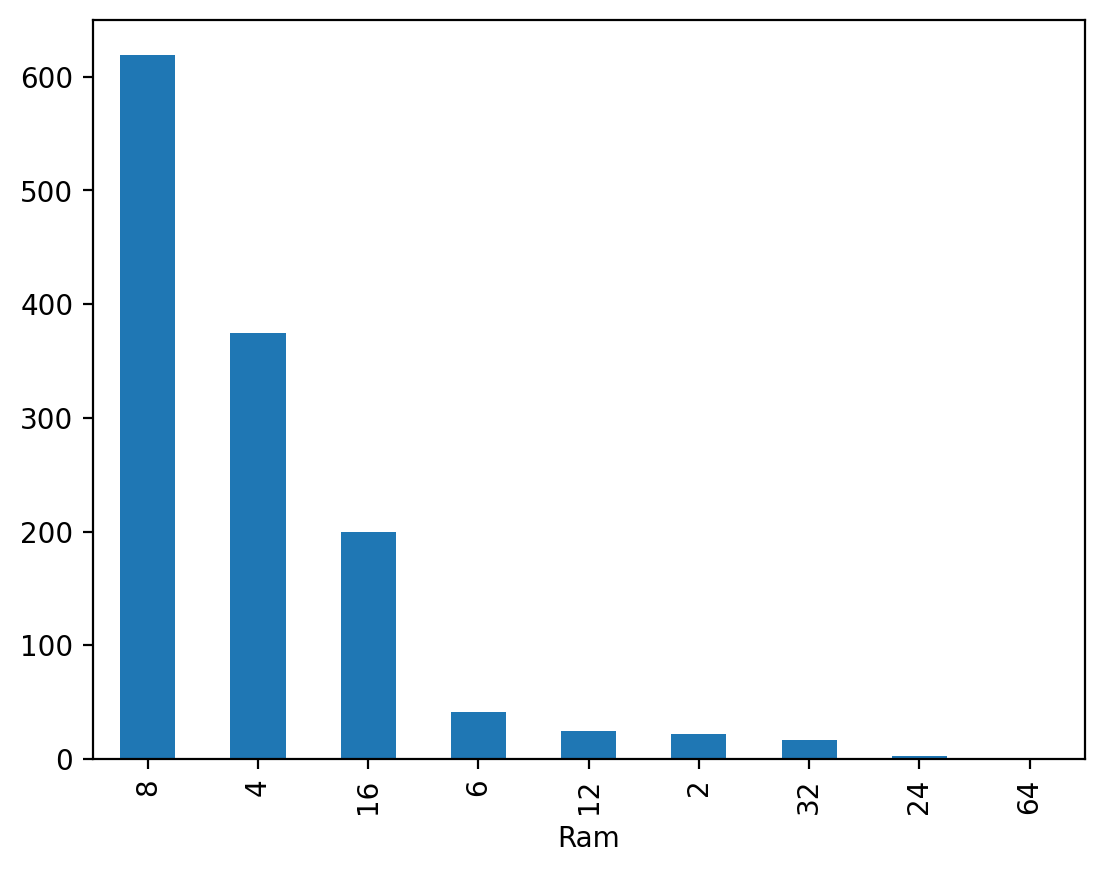

In [144]:
df['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '2'),
  Text(1, 0, '4'),
  Text(2, 0, '6'),
  Text(3, 0, '8'),
  Text(4, 0, '12'),
  Text(5, 0, '16'),
  Text(6, 0, '24'),
  Text(7, 0, '32'),
  Text(8, 0, '64')])

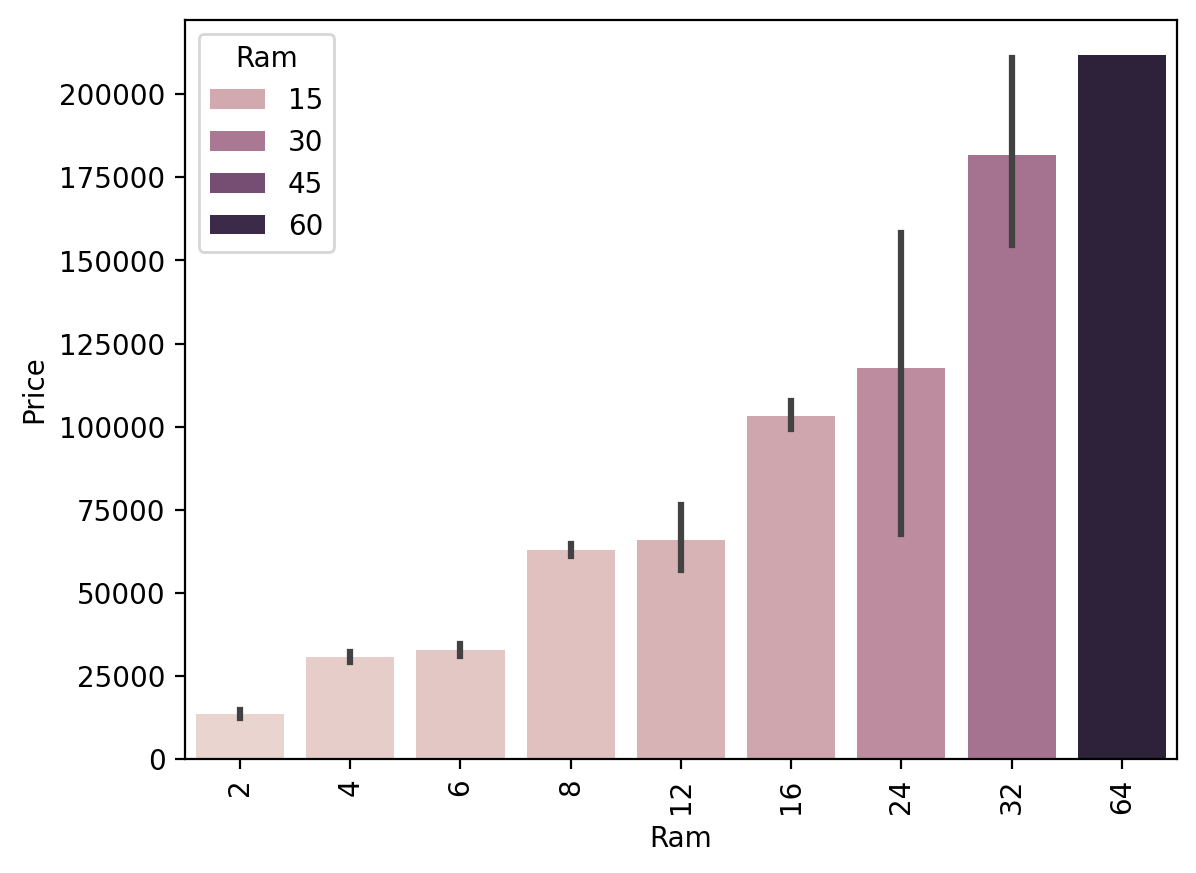

In [145]:
sns.barplot(x=df['Ram'],y=df['Price'],hue=df['Ram'])
plt.xticks(rotation=90)
plt.show()


* Most sold laptops are of 8 gb.
* Price of the laptop increases as the Ram increases.

In [148]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

* There is lot of information in the memory column.
* To handle memory column, I will make 4 columns namely SSD, HDD, Hybrid, Flash Storage which contains the number of gb in each of the type for a specific record.

In [154]:
df['Memory']=df['Memory'].astype(str).replace('\.0','',regex=True)

In [156]:
df['Memory']=df['Memory'].str.replace('GB','')

In [159]:
df['Memory']=df['Memory'].str.replace('TB','000')

In [164]:
new = df['Memory'].str.split('+',n=1,expand=True)

In [167]:
new[0]
df['first']=new[0]

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: 0, Length: 1303, dtype: object

In [170]:
df['first'].str.strip()
df['first']=df['first'].str.strip()

0                 128 SSD
1       128 Flash Storage
2                 256 SSD
3                 512 SSD
4                 256 SSD
              ...        
1298              128 SSD
1299              512 SSD
1300     64 Flash Storage
1301             1000 HDD
1302              500 HDD
Name: first, Length: 1303, dtype: object

In [172]:
new[1]
df['second']=new[1]

0       None
1       None
2       None
3       None
4       None
        ... 
1298    None
1299    None
1300    None
1301    None
1302    None
Name: 1, Length: 1303, dtype: object

In [173]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,Cpu speed,first,second
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,2.3,128 SSD,None
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,1.8,128 Flash Storage,None
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,2.5,256 SSD,None
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,2.7,512 SSD,None
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,3.1,256 SSD,None


In [175]:
df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x: 1 if 'SSD' in x else 0)

0       1
1       0
2       1
3       1
4       1
       ..
1298    1
1299    1
1300    0
1301    0
1302    0
Name: first, Length: 1303, dtype: int64

In [177]:
df['Layer1HDD']=df['first'].apply(lambda x: 1 if 'HDD' in x else 0)

In [185]:
df['Layer1Flash_Storage']=df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [188]:
df['Layer1Hybrid'] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)

In [195]:
#This code is for removing all the non digits from column first and replacing it with empty string, thereby eliminating alphabets
df['first']=df['first'].str.replace('\D', '',regex=True)

In [199]:
df['second'].fillna("0",inplace=True)

In [202]:
df['Layer2HDD']=df["second"].apply(lambda x: 1 if "HDD" in x else 0)

In [205]:
df['Layer2SSD']=df["second"].apply(lambda x: 1 if "SSD" in x else 0)

In [208]:
df['Layer2Flash_Storage']=df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [210]:
df['Layer2Hybrid']=df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)

In [213]:
#This code is for removing all the non digits from column first and replacing it with empty string, thereby eliminating alphabets
df['second']=df['second'].str.replace('\D', '',regex=True)

In [214]:
# Converting both to integer
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [217]:
df['HDD']=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])

In [220]:
df['SSD']=((df['first']*df['Layer1SSD'])+(df['second']*df['Layer2SSD'])).value_counts()

In [230]:
df['SSD']=((df['first']*df['Layer1SSD'])+(df['second']*df['Layer2SSD']))

In [223]:
df['Hybrid']=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])

In [226]:
df['Flash_Storage']=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [233]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [235]:
df.drop(columns=['Memory'],inplace=True)

In [236]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,ppi,Cpu brand,Cpu speed,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.98,Intel Core i5,2.3,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.68,Intel Core i5,1.8,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.21,Intel Core i5,2.5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.53,Intel Core i7,2.7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.98,Intel Core i5,3.1,0,256,0,0


In [239]:
df.select_dtypes(include='number').corr()['Price']

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
ppi              0.473506
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

The correlation of hybrid and flash_storage with price is very small, so by considering variance threshold of 0.05 we are dropping hybrid and flash_storage columns

In [242]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)

In [243]:
# Cleaning GPU column

df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [246]:
df['Gpu'].str.split(expand=True)[0].value_counts()
df['Gpu brand']=df['Gpu'].str.split(expand=True)[0]

0
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

There is only 1 row for ARM so it cannot be used in the analysis so removing it.

In [251]:
df= df.loc[~(df['Gpu brand']=='ARM')]

<Axes: xlabel='Gpu brand', ylabel='Price'>

([0, 1, 2], [Text(0, 0, 'Intel'), Text(1, 0, 'AMD'), Text(2, 0, 'Nvidia')])

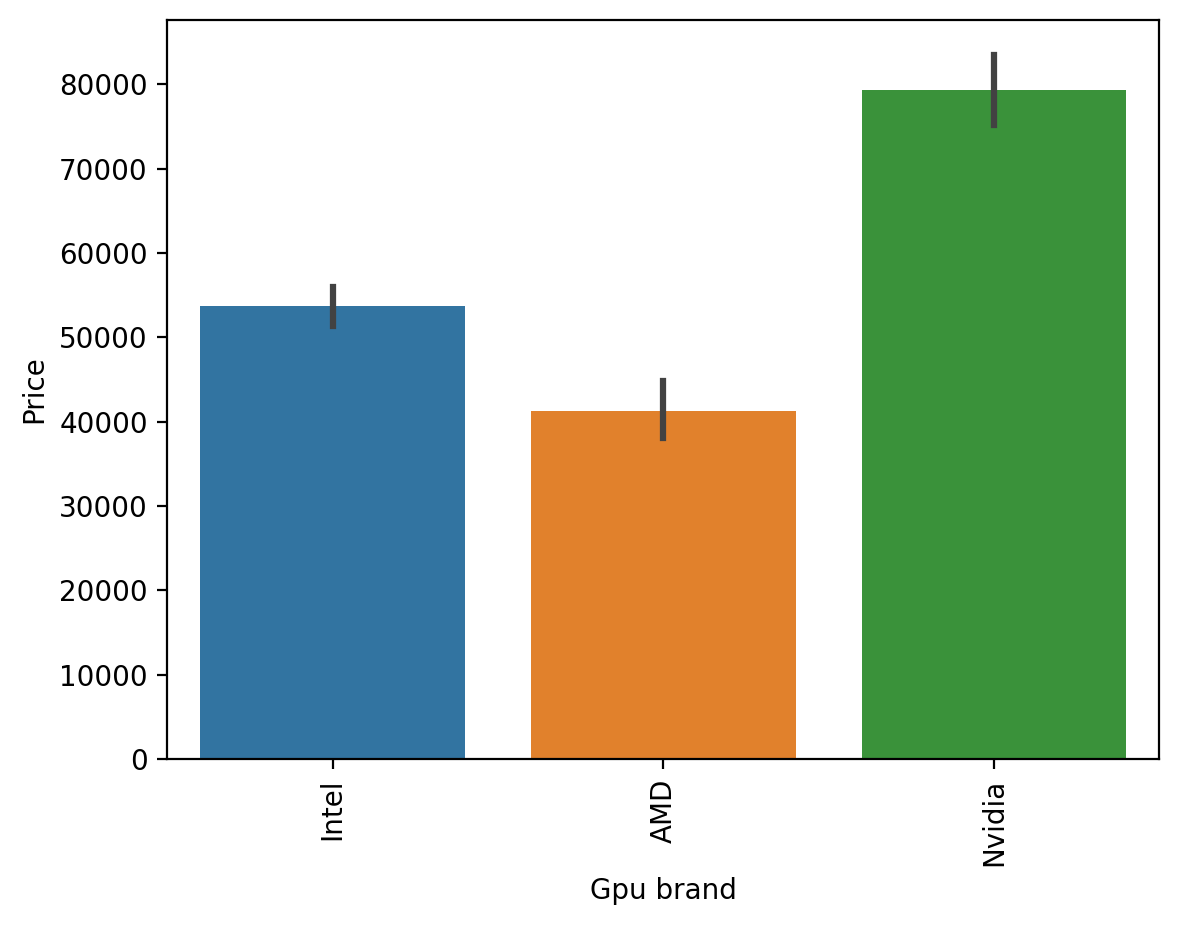

In [254]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],hue=df['Gpu brand'])
plt.xticks(rotation=90)
plt.show()

In [256]:
# dropping Gpu column now

df.drop(columns=['Gpu'],inplace=True)

In [257]:
# Cleaning OPS column
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [258]:
#Let's club all windows under one and macos under mac, and any other as others

def opsys_handler(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'Mac'
    else:
        return 'others'

In [261]:
df['OpSys'].apply(opsys_handler).value_counts()
df['os']=df['OpSys'].apply(opsys_handler)

OpSys
Windows    1125
others      156
Mac          21
Name: count, dtype: int64

In [263]:
df.drop(columns=['OpSys'],inplace=True)

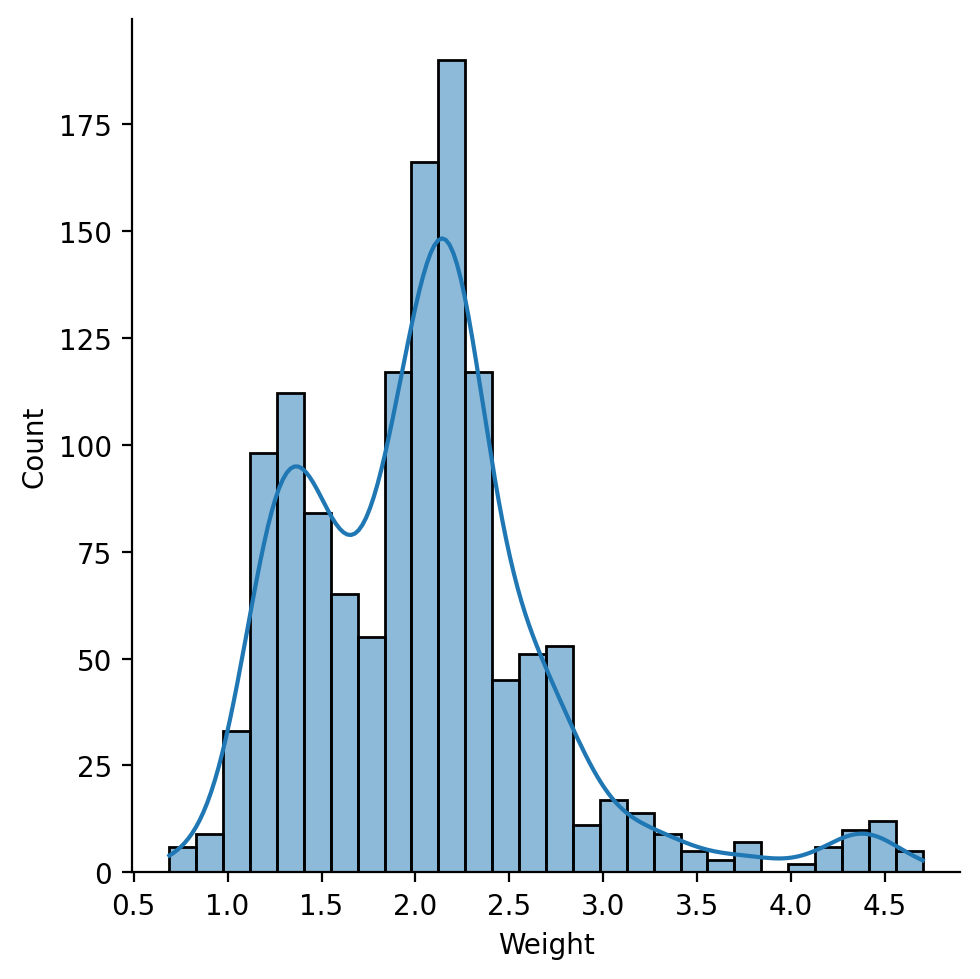

In [264]:
sns.displot(df['Weight'],kde=True)

<Axes: >

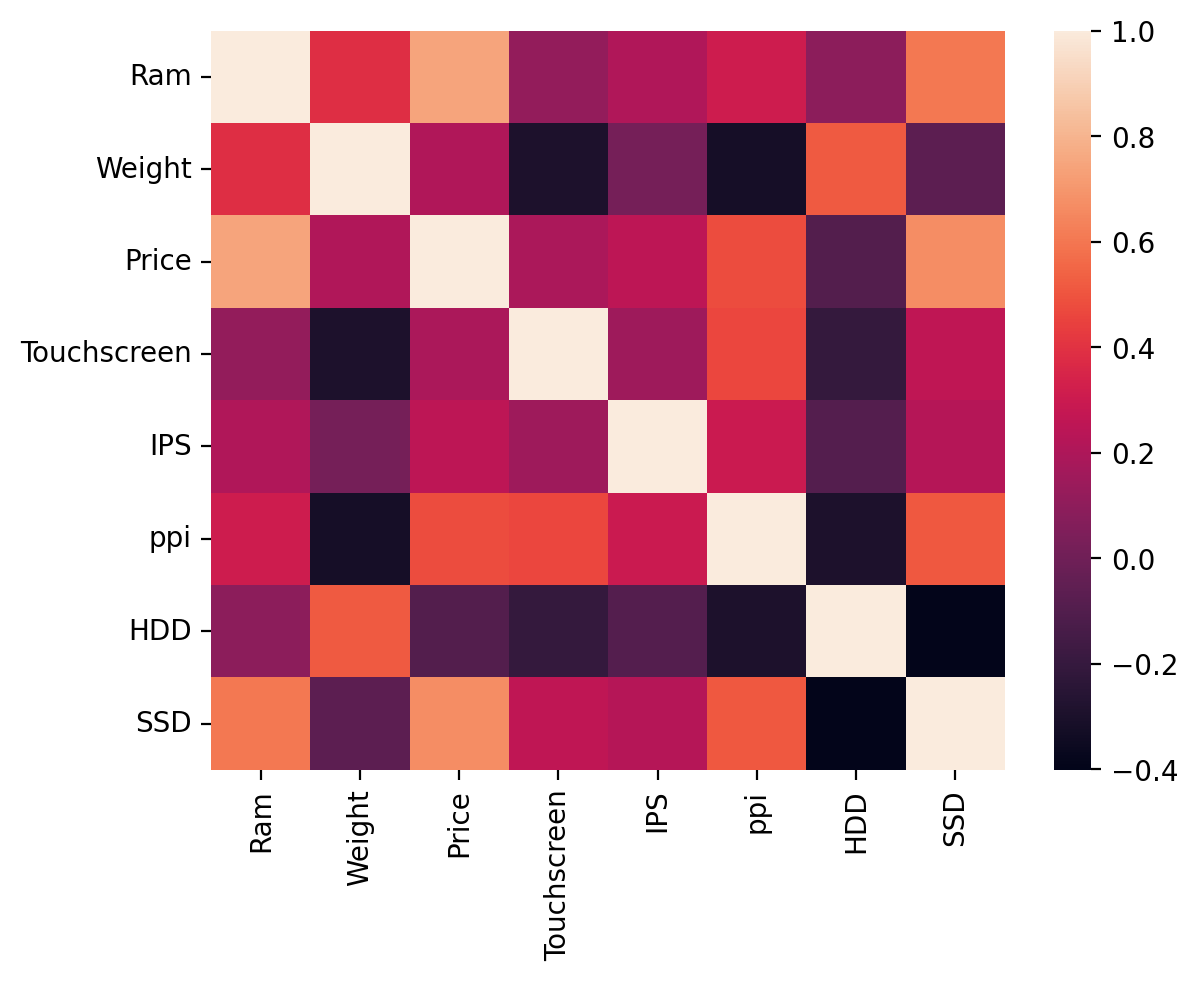

In [265]:
sns.heatmap(df.select_dtypes(include='number').corr(method='pearson'))

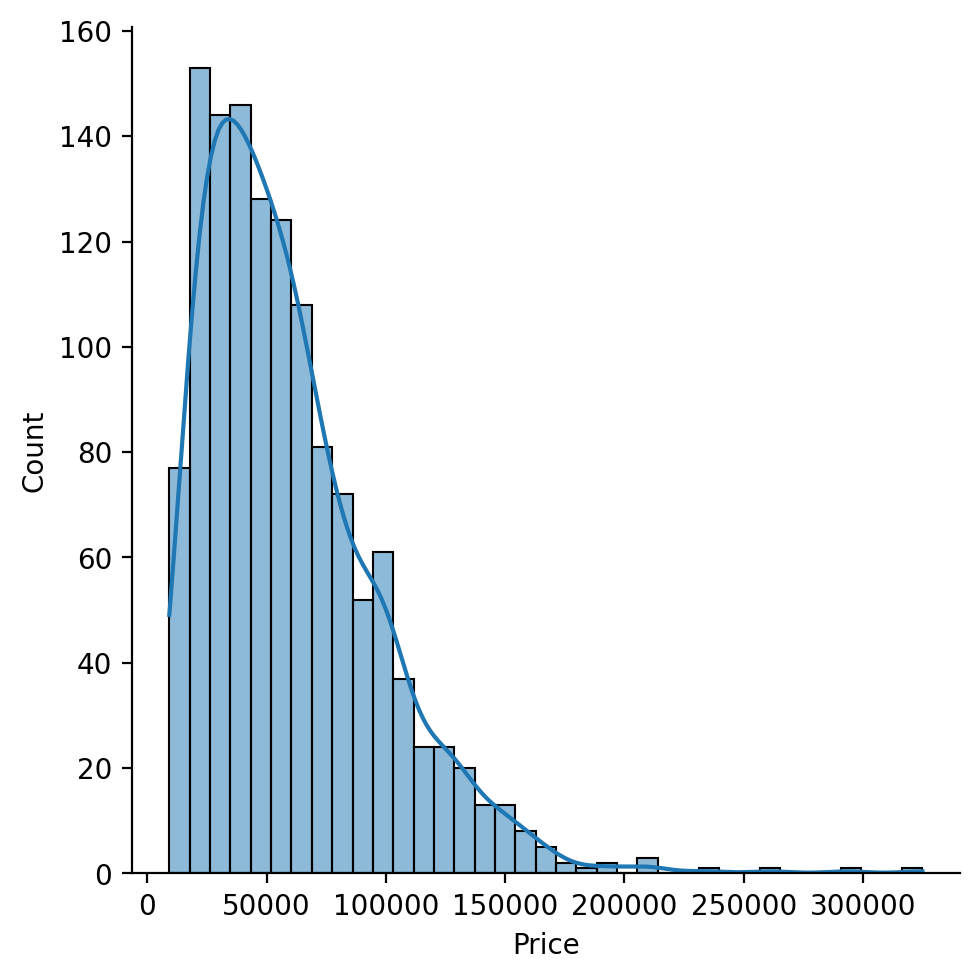

In [267]:
sns.displot(df['Price'],kde=True)

The target column is little right skewed, let's try to make it more normal using log transformation.

<Axes: xlabel='Price', ylabel='Density'>

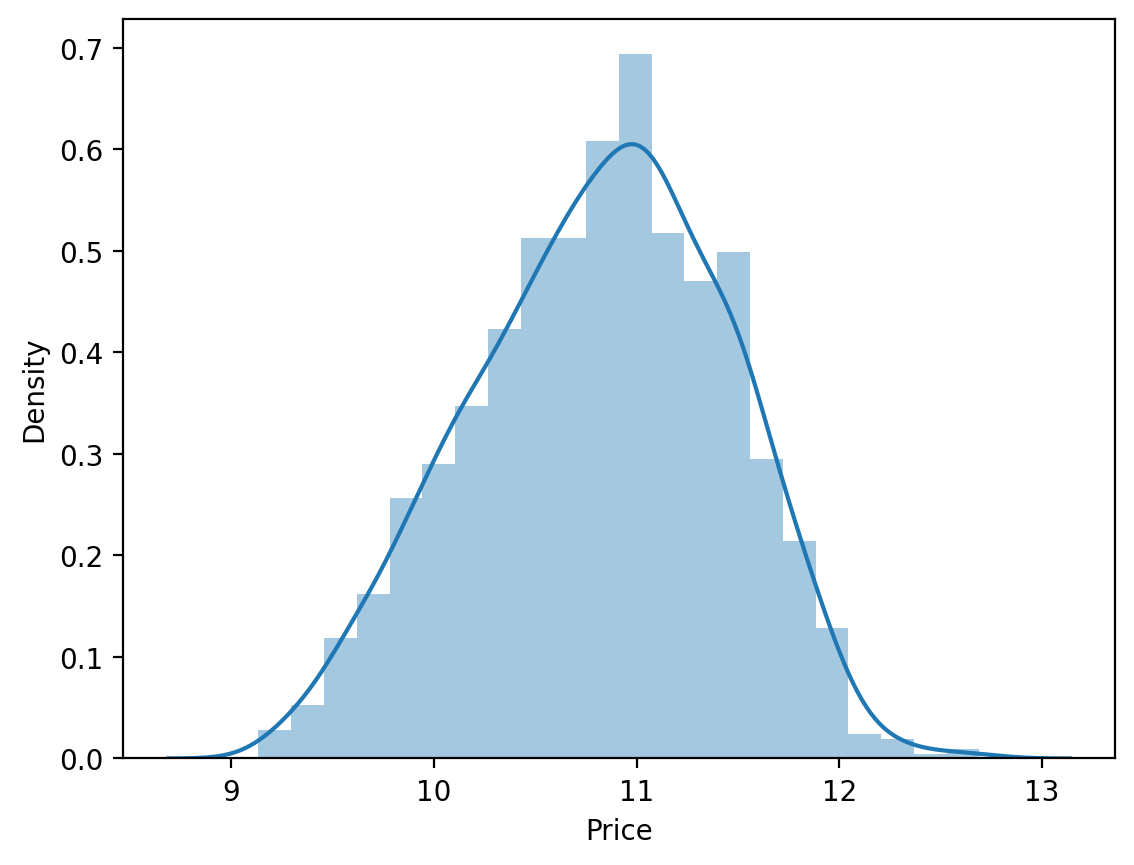

In [273]:
# The price will always be greater than 0 so we can apply log 
sns.distplot(np.log(df['Price']),kde=True)

As can be seen from above graph it is more normal now.

In [274]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [277]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42)

In [282]:
X_train.sample()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,Cpu speed,HDD,SSD,Gpu brand,os
1145,HP,Workstation,8,2.0,0,0,141.21,Intel Core i7,2.6,0,256,Nvidia,Windows


* For encoding, we can use one hot encoding for gpu brand and os since there are less number of columns.
* For company, typename and cpu brand we can use Target encoder. 

In [288]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [290]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [311]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler

In [291]:
X_train.sample()

,Company,TypeName,Ram,Weight,Touchscreen,IPS,ppi,Cpu brand,Cpu speed,HDD,SSD,Gpu brand,os
803,Dell,Notebook,8,2.06,1,0,282.42,Intel Core i5,2.5,0,256,Nvidia,Windows


In [354]:
# On analysis found that, in Cpu speed, there is some garbage value 'U 2' which is disturbing the analysis so dropping that column
X_train.drop(columns=['Cpu speed'],inplace=True)

In [357]:
X_test.drop(columns=['Cpu speed'],inplace=True)


In [358]:
# This code makes the transformers give the data in pandas df rather than numpy array
from sklearn import set_config
set_config(transform_output="pandas")

In [359]:
step_1 = ColumnTransformer(transformers=[
('OneHotEncoder',OneHotEncoder(sparse_output=False,drop='first'), ['Gpu brand','os']),
('TargetEncoder', TargetEncoder(),['Company','TypeName','Cpu brand'])],
remainder='passthrough'
)

In [362]:
step_2 = ColumnTransformer(transformers=[
    ('StandardScaler',StandardScaler(),slice(None))
])

In [363]:
pipe = Pipeline(steps=[('step1',step_1),('step2',step_2)])

In [365]:
pipe.fit_transform(X_train,y_train)

,StandardScaler__OneHotEncoder__Gpu brand_Intel,StandardScaler__OneHotEncoder__Gpu brand_Nvidia,StandardScaler__OneHotEncoder__os_Windows,StandardScaler__OneHotEncoder__os_others,StandardScaler__TargetEncoder__Company,StandardScaler__TargetEncoder__TypeName,StandardScaler__TargetEncoder__Cpu brand,StandardScaler__remainder__Ram,StandardScaler__remainder__Weight,StandardScaler__remainder__Touchscreen,StandardScaler__remainder__IPS,StandardScaler__remainder__ppi,StandardScaler__remainder__HDD,StandardScaler__remainder__SSD
945,-1.131553,-0.653526,0.402200,-0.371295,-0.124982,1.382191,-1.202805,1.446045,0.701190,-0.414259,1.588173,-0.136261,1.165056,1.757972
428,-1.131553,1.530160,0.402200,-0.371295,-0.126271,1.382191,0.957012,0.677323,1.965765,-0.414259,-0.629654,-0.459335,1.165056,0.376651
1261,0.883741,-0.653526,0.402200,-0.371295,-0.310394,1.239700,-1.793891,-0.091399,-1.232866,-0.414259,1.588173,0.432556,-0.798183,1.757972
174,-1.131553,1.530160,0.402200,-0.371295,-0.126271,-0.824135,0.035293,-0.091399,0.701190,-0.414259,-0.629654,-0.459335,-0.798183,0.376651
398,-1.131553,1.530160,0.402200,-0.371295,0.559405,1.227175,0.957012,-0.091399,-0.369979,2.413951,-0.629654,3.152951,-0.798183,0.376651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-1.131553,1.530160,0.402200,-0.371295,-2.630923,-0.824135,0.035293,-0.091399,0.552417,-0.414259,-0.629654,-0.136261,1.165056,0.376651
1130,0.883741,-0.653526,0.402200,-0.371295,-0.126271,-0.824135,0.957012,-0.091399,0.016832,-0.414259,-0.629654,-1.085685,3.128295,-1.004670
1295,-1.131553,-0.653526,-2.486326,2.693275,0.559405,-0.824135,0.957012,-0.091399,0.403643,-0.414259,-0.629654,-1.085685,1.165056,-1.004670
860,0.883741,-0.653526,0.402200,-0.371295,-0.124982,-0.824135,0.035293,-0.091399,0.403643,-0.414259,1.588173,-0.136261,1.165056,-1.004670
